# Wstęp do szeregów czasowych

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

## Zadanie 1
Wczytaj dane `a10.csv` opisujący miesięczną sprzedaż leków przeciwcukrzycowych w Australii w latach 1992–2008, a następnie:

- narysuj wykres wartości szeregu w zależności od czasu,
- narysuj *wykres sezonowy*, tzn. wykres wartości szeregu z podziałem na lata i miesiące,
- narysuj wykresy skrzynkowe z podziałem na lata i miesiące,
- narysuj wykres autokorelacji,
- narysuj wykres zależności obserwacji szeregu od opóźnień.

In [2]:
#funkcja do plotowania szeregów czasowych

def plot_time_series(t, val, title="", xlabel='Data', ylabel='Wartość', dpi=100):
    
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(t, val, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [3]:
#data to indeksy ramki danych, wartości w kolumnie
a10 = pd.read_csv('../data/a10.csv', parse_dates=['date'], index_col='date')
a10

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


### Wykres wartości szeregu w zależności od czasu

In [4]:
a10.values

array([[ 3.526591  ],
       [ 3.180891  ],
       [ 3.252221  ],
       [ 3.611003  ],
       [ 3.565869  ],
       [ 4.306371  ],
       [ 5.088335  ],
       [ 2.81452   ],
       [ 2.985811  ],
       [ 3.20478   ],
       [ 3.127578  ],
       [ 3.270523  ],
       [ 3.73785082],
       [ 3.55877609],
       [ 3.77720173],
       [ 3.92449042],
       [ 4.38653092],
       [ 5.81054917],
       [ 6.19206769],
       [ 3.45085699],
       [ 3.77230686],
       [ 3.7343029 ],
       [ 3.90539892],
       [ 4.04968714],
       [ 4.31556552],
       [ 4.56218455],
       [ 4.60866203],
       [ 4.66785129],
       [ 5.09384145],
       [ 7.1799622 ],
       [ 6.73147308],
       [ 3.84127758],
       [ 4.39407557],
       [ 4.07534073],
       [ 4.5406449 ],
       [ 4.64561508],
       [ 4.75260653],
       [ 5.35060467],
       [ 5.20445484],
       [ 5.3016513 ],
       [ 5.77374216],
       [ 6.20459348],
       [ 6.74948382],
       [ 4.21606735],
       [ 4.94934946],
       [ 4

In [5]:
a10.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

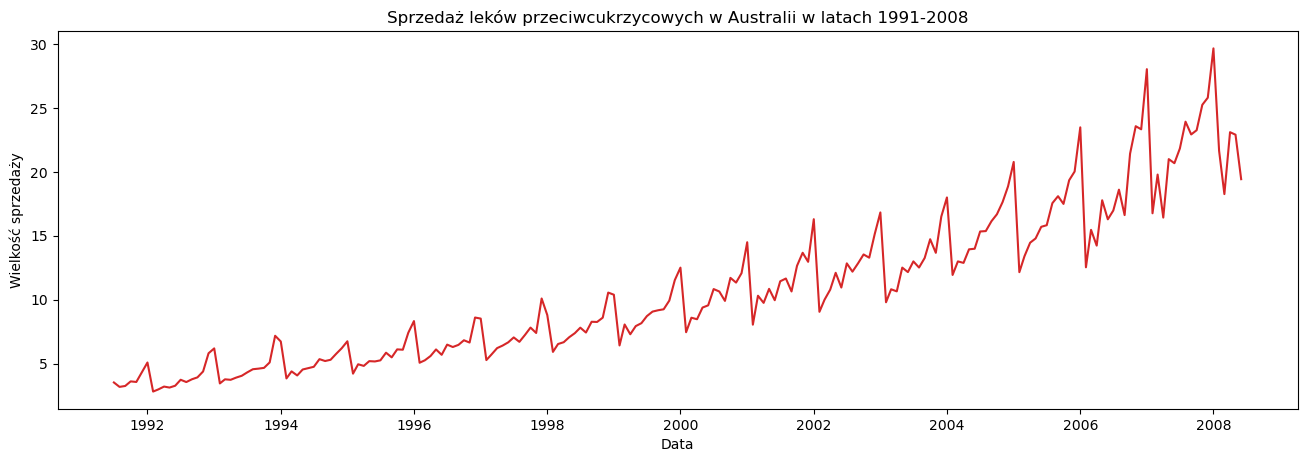

In [6]:
plot_time_series(a10.index, a10.values, title="Sprzedaż leków przeciwcukrzycowych w Australii w latach 1991-2008",
                 xlabel='Data', ylabel='Wielkość sprzedaży', dpi=100)

### Wykres sezonowy

In [30]:
a10_series = a10.value
a10_series = a10_series.loc[(a10_series.index >= '1992-01-01') & (a10_series.index < '2008-01-01')]
a10_series

date
1992-01-01     5.088335
1992-02-01     2.814520
1992-03-01     2.985811
1992-04-01     3.204780
1992-05-01     3.127578
                ...    
2007-08-01    23.930204
2007-09-01    22.930357
2007-10-01    23.263340
2007-11-01    25.250030
2007-12-01    25.806090
Name: value, Length: 192, dtype: float64

In [8]:
from pandas import Grouper
groups = a10_series.groupby(Grouper(freq = 'Y'))

In [9]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,5.088335,6.192068,6.731473,6.749484,8.329452,8.524471,8.798513,10.391416,12.511462,14.497581,16.300269,16.828350,18.003768,20.778723,23.486694,28.038383
1,2.814520,3.450857,3.841278,4.216067,5.069796,5.277918,5.918261,6.421535,7.457199,8.049275,9.053485,9.800215,11.938030,12.154552,12.536987,16.763869
2,2.985811,3.772307,4.394076,4.949349,5.262557,5.714303,6.534493,8.062619,8.591191,10.312891,10.002449,10.816994,12.997900,13.402392,15.467018,19.792754
3,3.204780,3.734303,4.075341,4.823045,5.597126,6.214529,6.675736,7.297739,8.474000,9.753358,10.788750,10.654223,12.882645,14.459239,14.233539,16.427305
4,3.127578,3.905399,4.540645,5.194754,6.110296,6.411929,7.064201,7.936916,9.386803,10.850382,12.106705,12.512323,13.943447,14.795102,17.783058,21.000742
5,3.270523,4.049687,4.645615,5.170787,5.689161,6.667716,7.383381,8.165323,9.560399,9.961719,10.954101,12.161210,13.989472,15.705248,16.291602,20.681002
6,3.737851,4.315566,4.752607,5.256742,6.486849,7.050831,7.813496,8.717420,10.834295,11.443601,12.844566,12.998046,15.339097,15.829550,16.980282,21.834890
7,3.558776,4.562185,5.350605,5.855277,6.300569,6.704919,7.431892,9.070964,10.643751,11.659239,12.196500,12.517276,15.370764,17.554701,18.612189,23.930204
8,3.777202,4.608662,5.204455,5.490729,6.467476,7.250988,8.275117,9.177113,9.908162,10.647060,12.854748,13.268658,16.142005,18.100864,16.623343,22.930357
9,3.924490,4.667851,5.301651,6.115293,6.828629,7.819733,8.260441,9.251887,11.710041,12.652134,13.542004,14.733622,16.685754,17.496668,21.430241,23.263340


<AxesSubplot:>

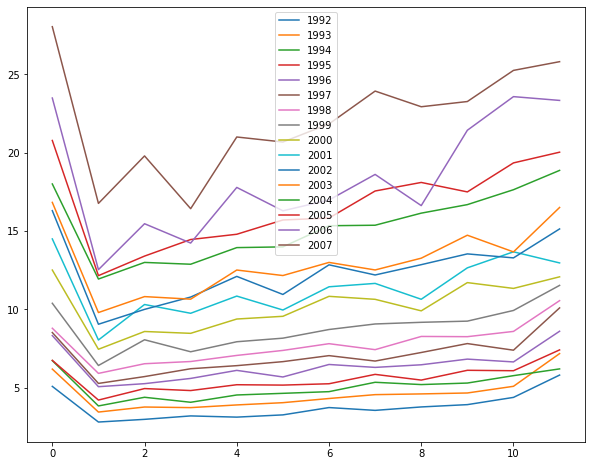

In [10]:
years.plot(figsize = (10, 8))

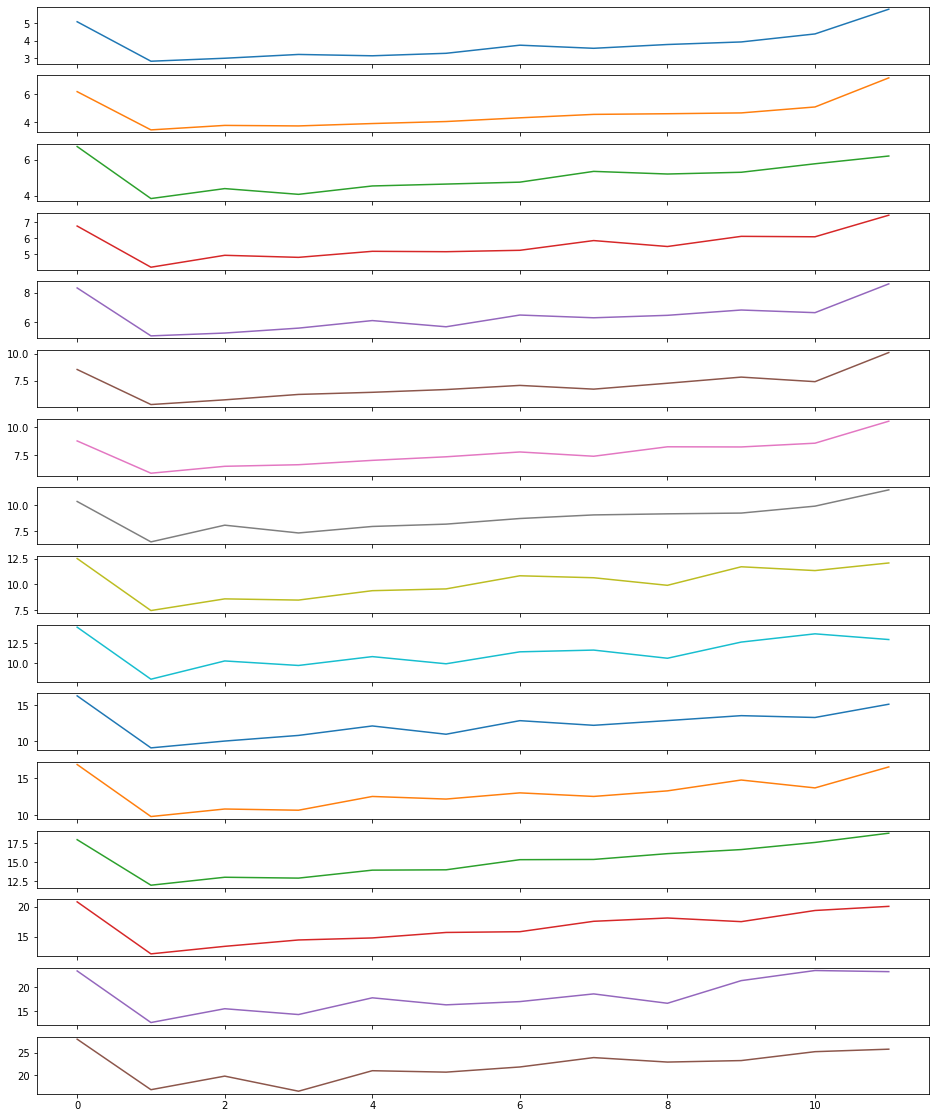

In [11]:
years.plot(subplots = True, legend = False, figsize = (16, 20))
plt.show()

### Wykresy skrzynkowe

- roczne (trend)
- miesięczne (sezonowość)

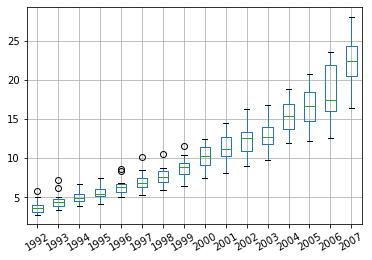

In [12]:
years.boxplot()
plt.xticks(rotation = 30)
plt.show()

In [13]:
months = years.T
months

,0,1,2,3,4,5,6,7,8,9,10,11
1992,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776,3.777202,3.924490,4.386531,5.810549
1993,6.192068,3.450857,3.772307,3.734303,3.905399,4.049687,4.315566,4.562185,4.608662,4.667851,5.093841,7.179962
1994,6.731473,3.841278,4.394076,4.075341,4.540645,4.645615,4.752607,5.350605,5.204455,5.301651,5.773742,6.204593
1995,6.749484,4.216067,4.949349,4.823045,5.194754,5.170787,5.256742,5.855277,5.490729,6.115293,6.088473,7.416598
1996,8.329452,5.069796,5.262557,5.597126,6.110296,5.689161,6.486849,6.300569,6.467476,6.828629,6.649078,8.606937
1997,8.524471,5.277918,5.714303,6.214529,6.411929,6.667716,7.050831,6.704919,7.250988,7.819733,7.398101,10.096233
1998,8.798513,5.918261,6.534493,6.675736,7.064201,7.383381,7.813496,7.431892,8.275117,8.260441,8.596156,10.558939
1999,10.391416,6.421535,8.062619,7.297739,7.936916,8.165323,8.717420,9.070964,9.177113,9.251887,9.933136,11.532974
2000,12.511462,7.457199,8.591191,8.474000,9.386803,9.560399,10.834295,10.643751,9.908162,11.710041,11.340151,12.079132
2001,14.497581,8.049275,10.312891,9.753358,10.850382,9.961719,11.443601,11.659239,10.647060,12.652134,13.674466,12.965735


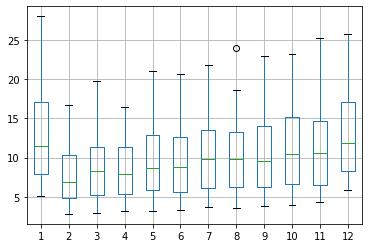

In [14]:
months.boxplot()
plt.xticks(ticks = np.arange(1, 13), labels = np.arange(1, 13))
plt.show()

In [47]:
a10_series = pd.DataFrame(a10_series)

In [48]:
a10_series['year'] = [d.year for d in a10_series.index]
a10_series['month'] = [d.strftime('%b') for d in a10_series.index]
a10_series

,value,year,month
date,,,
1992-01-01,5.088335,1992,Jan
1992-02-01,2.814520,1992,Feb
1992-03-01,2.985811,1992,Mar
1992-04-01,3.204780,1992,Apr
1992-05-01,3.127578,1992,May
...,...,...,...
2007-08-01,23.930204,2007,Aug
2007-09-01,22.930357,2007,Sep
2007-10-01,23.263340,2007,Oct


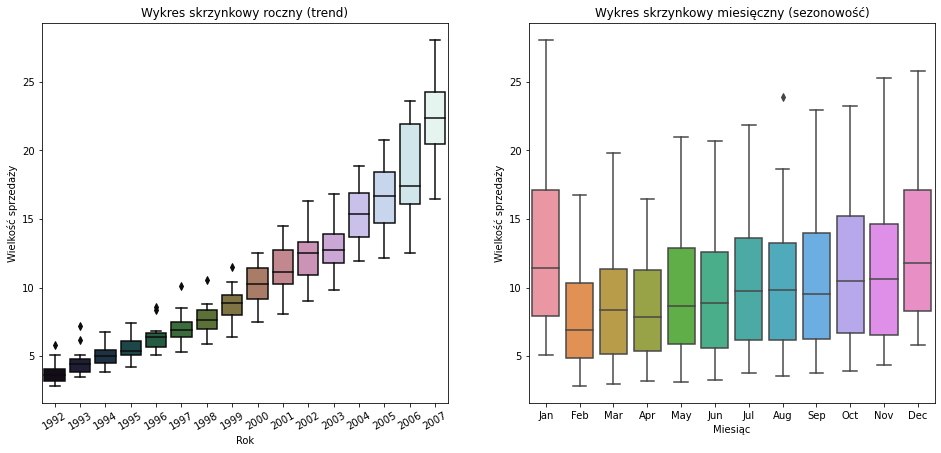

In [17]:
# wykresy skrzynkowe dla poszczególnych lat i miesięcy

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.boxplot(x='year', y='value', data=a10_series, ax=axes[0], palette='cubehelix').set(
    xlabel='Rok',
    ylabel='Wielkość sprzedaży'
)

sns.boxplot(x='month', y='value', data=a10_series, ax=axes[1]).set(
    xlabel='Miesiąc',
    ylabel='Wielkość sprzedaży'
)

axes[0].set_title('Wykres skrzynkowy roczny (trend)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
axes[1].set_title('Wykres skrzynkowy miesięczny (sezonowość)')

plt.show()

### Wykres autokorelacji

In [18]:
from pandas.plotting import autocorrelation_plot

## Zadanie 1a
Zaimplementuj własną funkcję do wyznaczenia autokorelacji dowolnego szeregu. 
Sporządź wykres jak powyżej.

**Przypomnienie**:

**Autokowariancja**
\begin{equation*}
    \hat{\gamma}(h) = \frac{1}{n} \sum_{i=1}^{n-h}(y_i - \overline{y})(y_{i+h} - \overline{y})
\end{equation*}

**Autokorelacja**
\begin{equation*}
    \text{ACF}(h) = \frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}
\end{equation*}

In [19]:
#funkcja licząca gamma_z_daszkiem(h)
def Cov(y, h):
    
    n = len(y)
    y_mean = np.mean(y)
    cov = np.sum([(y[i] - y_mean) * (y[i+h] - y_mean) for i in range(n - h)])
    cov /= n
    
    return cov

#gamma_z_daszkiem(h)/gamma_z_daszkiem(0)
def ACF(y, h):
   
    acf_h = Cov(y, h) / Cov(y, 0)
    return acf_h

#wykres autokorelacji
def autocorrelation_plot2(series, lag=100, min_lag=1):
   
    h_range = range(min_lag, lag + 1)
    acf = [ACF(series, i) for i in h_range]
    
    plt.plot(h_range, acf)
    
    plt.hlines(xmin=min_lag, xmax=lag, y=0)
    #pas to kwantyl z rozkładu normalnego na poziomie 0.975 dzielone przez pierwiastek długości szeregu
    pufn = 1.96 / np.sqrt(len(series))
    plt.hlines(xmin=min_lag, xmax=lag, y=pufn,linestyles='dashed')
    plt.hlines(xmin=min_lag, xmax=lag, y=-pufn,linestyles='dashed')
    
    plt.xlim([min_lag, lag])
    plt.xlabel("Lag")
    plt.ylim([-1, 1])
    plt.ylabel("Autocorrelation")

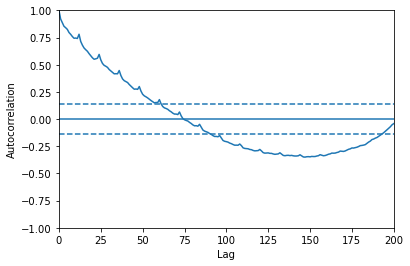

In [20]:
autocorrelation_plot2(a10.value.tolist(), lag = 200, min_lag = 0)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

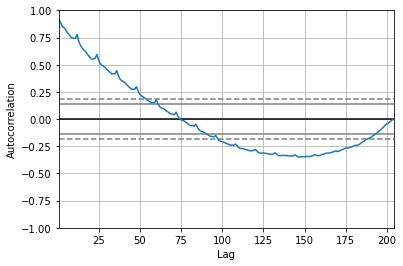

In [21]:
# charakterystyczna autokorelacja dla trendu
autocorrelation_plot(a10.value.tolist())
plt.show()

### Wykres zależności obserwacji szeregu od opóźnień

Wykres zależności obserwacji szeregu od opóźnień zwykle służy do sprawdzania autokorelacji. Jeśli na wykresie rozproszenia zauważalny jest jakikolwiek wzorzec, wówczas możemy sądzić, że szereg jest autoskorelowany. Jeśli punkty układają się w sposób losowy, wówczas będzie przypadkowym *białym szumem*.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

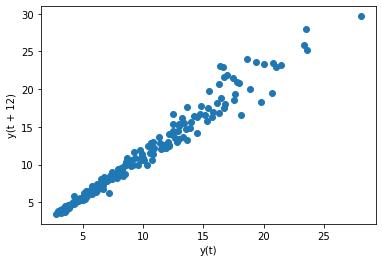

In [63]:
pd.plotting.lag_plot(a10.value, lag=12)
plt.show()

## Zadanie 2

Wczytaj dane `daily-min-temperatures.csv` opisujący minimalne dzienne temperatury w ciągu 10 lat (1981-1990) w Melbourne w Australii, a następnie:

- narysuj wykres wartości szeregu w zależności od czasu,
- narysuj wykres sezonowy, tzn. wykres wartości szeregu z podziałem na miesiące i dni,
- narysuj wykresy skrzynkowe z podziałem na miesiące i dni,
- narysuj wykres autokorelacji,
- narysuj wykres zależności obserwacji szeregu od opóźnień.

In [25]:
daily_temp = pd.read_csv('../data/daily-min-temperatures.csv', parse_dates=['Date'], index_col='Date')
daily_temp

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


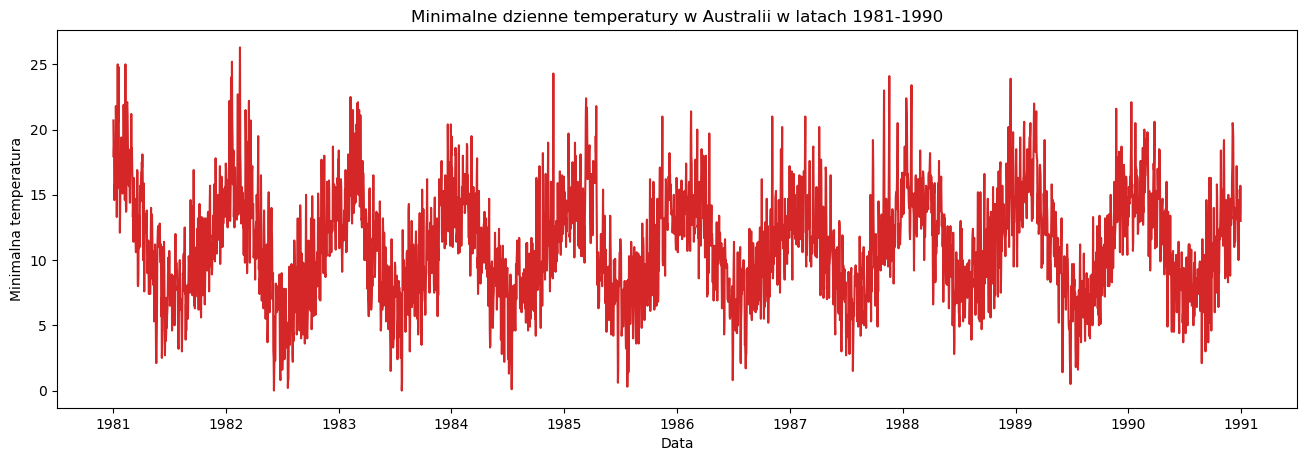

In [24]:
plot_time_series(daily_temp.index, daily_temp.values, title="Minimalne dzienne temperatury w Australii w latach 1981-1990",
                 xlabel='Data', ylabel='Minimalna temperatura', dpi=100)

In [42]:
daily_temp_series = daily_temp.Temp

groups = daily_temp_series.groupby(Grouper(freq = 'Y'))

years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


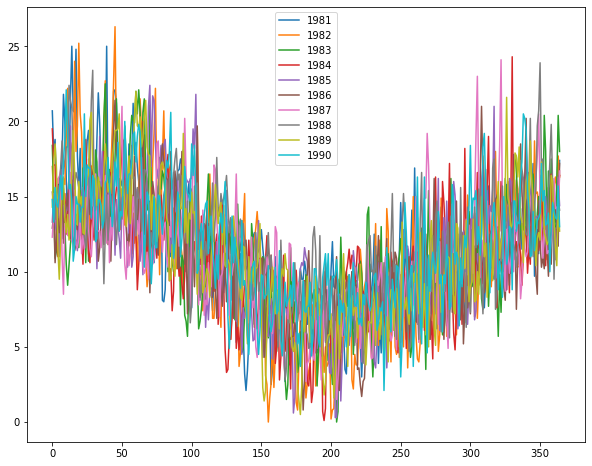

In [44]:
years.plot(figsize = (10, 8))
plt.show()

In [56]:
daily_temp_series = pd.DataFrame(daily_temp)

daily_temp_series['year'] = [d.year for d in daily_temp_series.index]
daily_temp_series['month'] = [d.strftime('%b') for d in daily_temp_series.index]
daily_temp_series['day'] = [d.strftime('%d') for d in daily_temp_series.index]
daily_temp_series

,Temp,year,month,day
Date,,,,
1981-01-01,20.7,1981,Jan,01
1981-01-02,17.9,1981,Jan,02
1981-01-03,18.8,1981,Jan,03
1981-01-04,14.6,1981,Jan,04
1981-01-05,15.8,1981,Jan,05
...,...,...,...,...
1990-12-27,14.0,1990,Dec,27
1990-12-28,13.6,1990,Dec,28
1990-12-29,13.5,1990,Dec,29


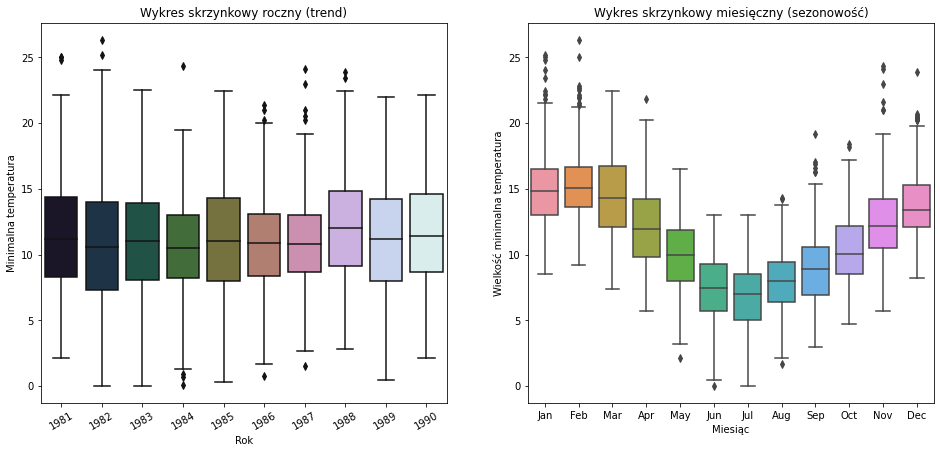

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.boxplot(x='year', y='Temp', data=daily_temp_series, ax=axes[0], palette='cubehelix').set(
    xlabel='Rok',
    ylabel='Minimalna temperatura'
)

sns.boxplot(x='month', y='Temp', data=daily_temp_series, ax=axes[1]).set(
    xlabel='Miesiąc',
    ylabel='Wielkość minimalna temperatura'
)

axes[0].set_title('Wykres skrzynkowy roczny')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
axes[1].set_title('Wykres skrzynkowy miesięczny (sezonowość)')

plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

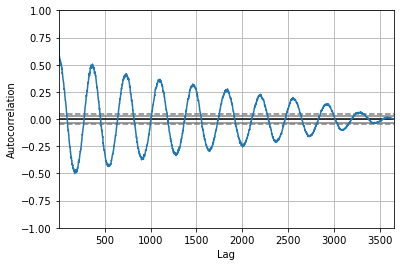

In [60]:
# charakterystyczna autokorelacja dla sezonowości
autocorrelation_plot(daily_temp.Temp.tolist())
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 365)'>

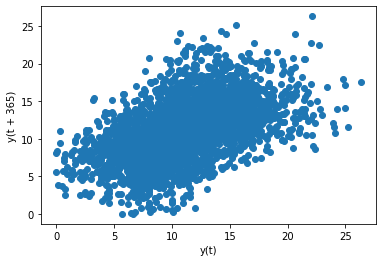

In [62]:
pd.plotting.lag_plot(daily_temp.Temp, lag=365)
plt.show()

## Zadanie 3

Wczytaj dane `daily-total-female-births.csv` przedstawiający całkowitą liczbę urodzeń kobiet zarejestrowanych w Kalifornii w USA w 1959 roku, a następnie:

- narysuj wykres wartości szeregu w zależności od czasu,
- narysuj wykresy skrzynkowe z podziałem na miesiące i dni,
- narysuj wykres autokorelacji,
- narysuj wykres zależności obserwacji szeregu od opóźnień.


In [64]:
daily_birth = pd.read_csv('../data/daily-total-female-births.csv', parse_dates=['Date'], index_col='Date')
daily_birth.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


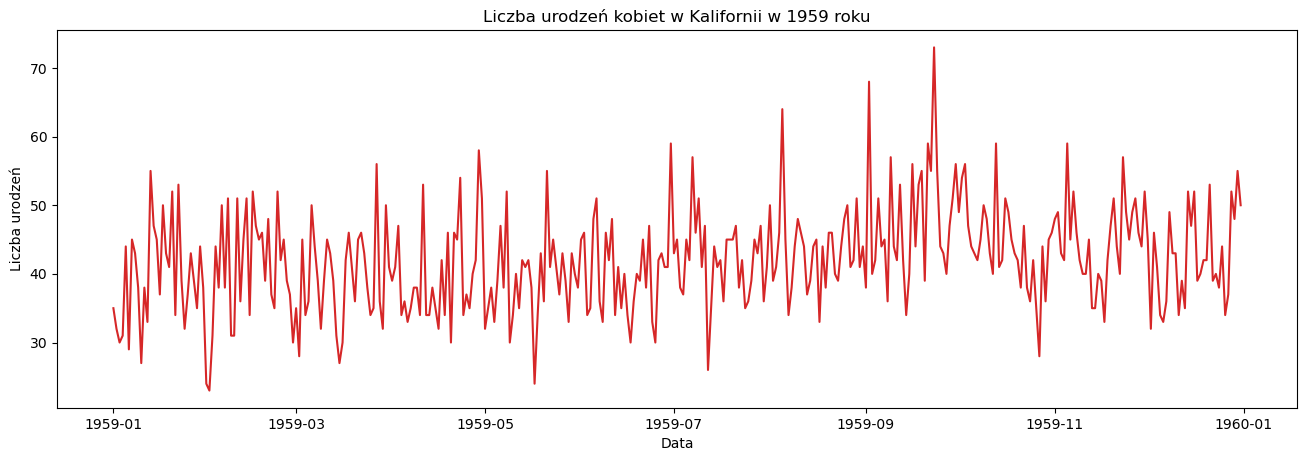

In [66]:
plot_time_series(daily_birth.index, daily_birth.values, title="Liczba urodzeń kobiet w Kalifornii w 1959 roku",
                 xlabel='Data', ylabel='Liczba urodzeń', dpi=100)

In [67]:
daily_birth_series = pd.DataFrame(daily_birth)

daily_birth_series['month'] = [d.strftime('%b') for d in daily_birth_series.index]
daily_birth_series['day'] = [d.strftime('%d') for d in daily_birth_series.index]
daily_birth_series

,Births,month,day
Date,,,
1959-01-01,35,Jan,01
1959-01-02,32,Jan,02
1959-01-03,30,Jan,03
1959-01-04,31,Jan,04
1959-01-05,44,Jan,05
...,...,...,...
1959-12-27,37,Dec,27
1959-12-28,52,Dec,28
1959-12-29,48,Dec,29


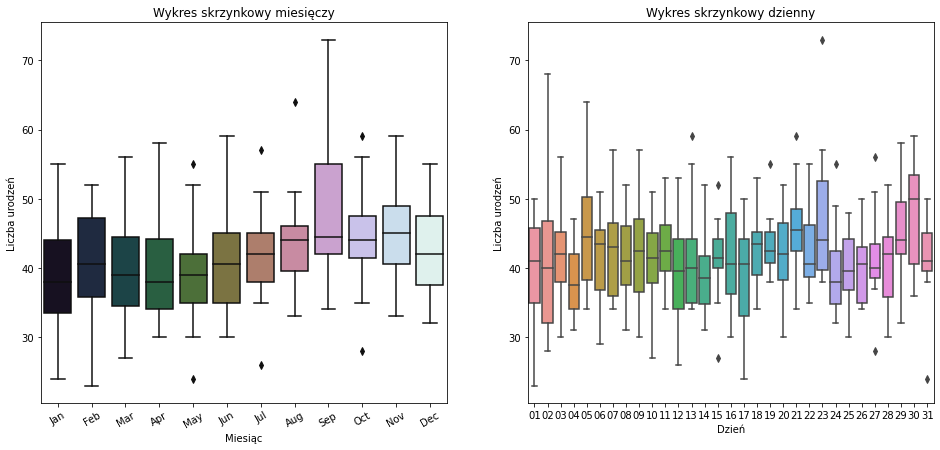

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.boxplot(x='month', y='Births', data=daily_birth_series, ax=axes[0], palette='cubehelix').set(
    xlabel='Miesiąc',
    ylabel='Liczba urodzeń'
)

sns.boxplot(x='day', y='Births', data=daily_birth_series, ax=axes[1]).set(
    xlabel='Dzień',
    ylabel='Liczba urodzeń'
)

axes[0].set_title('Wykres skrzynkowy miesięczy')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
axes[1].set_title('Wykres skrzynkowy dzienny')

plt.show()

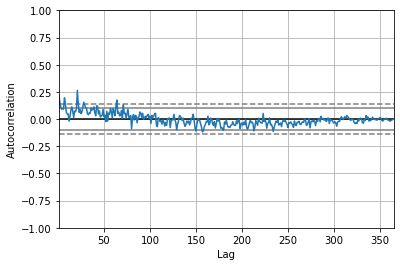

In [71]:
# charakterystyczna autokorelacja dla szeregu stacjonarnego
autocorrelation_plot(daily_birth.Births.tolist())
plt.show()

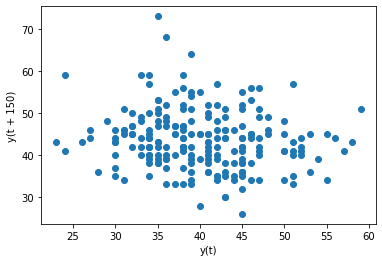

In [82]:
pd.plotting.lag_plot(daily_birth.Births, lag=150)
plt.show()